In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("AyurGenixAI_Dataset.csv")
df.head()

,Disease,Hindi Name,Marathi Name,Symptoms,Diagnosis & Tests,Symptom Severity,Duration of Treatment,Medical History,Current Medications,Risk Factors,...,Formulation,Doshas,Constitution/Prakriti,Diet and Lifestyle Recommendations,Yoga & Physical Therapy,Medical Intervention,Prevention,Prognosis,Complications,Patient Recommendations
0,Cough,खांसी,खोकला,"Sore throat, chest congestion","Chest X-ray, Blood tests, Sputum analysis",Mild to Moderate,1-2 weeks,"Asthma, Respiratory Issues","Cough syrup, Inhalers","Viral infections, Smoking",...,"Ginger (2g), Honey (1 tsp)","Vata, Kapha",Vata-Kapha,Avoid cold foods; stay hydrated; consume warm ...,"Anulom Vilom, Pranayama","Cough syrup, Antibiotics",Avoid irritants,Usually mild,"Bronchitis, Pneumonia","Stay hydrated, rest"
1,Diabetes,मधुमेह,मधुमेह,"Frequent urination, fatigue","Blood sugar test, HbA1c test",Moderate to High,Lifetime management,Family history of diabetes,"Insulin, Metformin","Obesity, Genetics, Age > 40",...,Fenugreek (3g daily),"Pitta, Kapha",Kapha,Avoid sugary foods; focus on low-GI foods; reg...,"Surya Namaskar, Pranayama","Insulin, Oral meds",Regular exercise,"Chronic, manageable","Retinopathy, Kidney disease","Healthy diet, exercise"
2,Hypertension,उच्च रक्तचाप,उच्च रक्तदाब,"High blood pressure, stress",Blood pressure measurement,High,Lifetime management,"Heart disease, Stroke","Beta-blockers, Diuretics","Family history, Obesity, Age",...,Ashwagandha (5g daily),"Pitta, Vata",Pitta,Reduce salt; practice yoga and meditation; avo...,"Surya Namaskar, Meditation",Antihypertensive meds,Salt restriction,Chronic,"Heart failure, Stroke","Limit salt, exercise"
3,Migraine,माइग्रेन,डोकेदुखी,"Severe headache, nausea","CT scan, MRI, Neurological exam",Moderate to Severe,3-4 days for relief,Family history of migraines,Pain relievers (NSAIDs),"Stress, Hormonal changes",...,Peppermint (2 drops in water),"Pitta, Vata",Pitta-Vata,Maintain regular meal times; avoid bright ligh...,"Anulom Vilom, Pranayama","Pain relievers, Botox",Stress management,Variable,"Stroke, Anxiety, Depression","Sleep, avoid triggers"
4,Arthritis,गठिया,आर्थरायटीस,"Joint pain, swelling","X-ray, MRI, Blood tests (RA factor)",Moderate to Severe,Variable,"Joint pain, Obesity",Pain relievers (NSAIDs),"Age, Joint overuse, Genetics",...,"Turmeric (1/2 tsp), Milk (200ml)","Vata, Kapha",Vata,Consume anti-inflammatory foods; stay active; ...,"Yoga for flexibility, Strength","NSAIDs, Steroids",Weight management,Chronic,"Joint deformity, Mobility issues","Exercise, joint care"


In [4]:
def map_disease_group(disease):
    d = disease.lower()

    if any(x in d for x in ['migraine', 'headache', 'epilep', 'parkinson', 'nerve', 'sleep']):
        return 'Neurological Disorders'

    elif any(x in d for x in ['hypertension', 'heart', 'cardio', 'angina', 'stroke']):
        return 'Cardiovascular Disorders'

    elif any(x in d for x in ['diabetes', 'thyroid', 'hormone', 'endocrine']):
        return 'Metabolic & Endocrine Disorders'

    elif any(x in d for x in ['asthma', 'bronch', 'copd', 'cough', 'respir']):
        return 'Respiratory Disorders'

    elif any(x in d for x in ['gastr', 'crohn', 'ulcerative', 'constipation', 'diarrhea', 'digest']):
        return 'Digestive Disorders'

    elif any(x in d for x in ['arthritis', 'joint', 'muscle', 'back pain', 'orthopedic']):
        return 'Musculoskeletal Disorders'

    elif any(x in d for x in ['autoimmune', 'inflamm']):
        return 'Autoimmune & Inflammatory Disorders'

    elif any(x in d for x in ['infection', 'virus', 'fever', 'flu', 'covid']):
        return 'Infectious Diseases'

    elif any(x in d for x in ['anxiety', 'stress', 'depression', 'mental', 'panic']):
        return 'Mental Health Disorders'

    elif any(x in d for x in ['anemia', 'blood']):
        return 'Blood Disorders'

    elif any(x in d for x in ['menstrual', 'fertility', 'ovarian', 'uterine', 'sexual']):
        return 'Reproductive Health Disorders'

    elif any(x in d for x in ['skin', 'rash', 'eczema', 'psoriasis', 'derma']):
        return 'Skin Disorders'

    elif any(x in d for x in ['hair', 'alopecia', 'dandruff']):
        return 'Hair & Scalp Disorders'

    elif any(x in d for x in ['kidney', 'renal', 'urinary', 'liver', 'hepatic']):
        return 'Liver, Kidney & Urinary Disorders'

    elif 'cancer' in d or 'tumor' in d:
        return 'Cancer Disorders'

    elif any(x in d for x in ['child', 'pediatric', 'congenital']):
        return 'Pediatric Disorders'

    elif 'syndrome' in d:
        return 'Genetic & Rare Disorders'

    else:
        return 'General / Other Disorders'


In [5]:
df['Disease_Group'] = df['Disease'].apply(map_disease_group)
df[['Disease', 'Disease_Group']].head(10)


,Disease,Disease_Group
0,Cough,Respiratory Disorders
1,Diabetes,Metabolic & Endocrine Disorders
2,Hypertension,Cardiovascular Disorders
3,Migraine,Neurological Disorders
4,Arthritis,Musculoskeletal Disorders
5,Common Cold,General / Other Disorders
6,Indigestion,Digestive Disorders
7,Asthma,Respiratory Disorders
8,Constipation,Digestive Disorders
9,Insomnia,General / Other Disorders


In [6]:
df['Disease_Group'].value_counts()


Disease_Group
General / Other Disorders              241
Genetic & Rare Disorders                40
Infectious Diseases                     35
Cardiovascular Disorders                16
Liver, Kidney & Urinary Disorders       14
Skin Disorders                          12
Metabolic & Endocrine Disorders         12
Cancer Disorders                        12
Digestive Disorders                     11
Respiratory Disorders                   10
Neurological Disorders                  10
Musculoskeletal Disorders               10
Mental Health Disorders                  9
Autoimmune & Inflammatory Disorders      4
Reproductive Health Disorders            4
Hair & Scalp Disorders                   3
Blood Disorders                          3
Name: count, dtype: int64

In [7]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Disease                             446 non-null    object
 1   Hindi Name                          446 non-null    object
 2   Marathi Name                        446 non-null    object
 3   Symptoms                            446 non-null    object
 4   Diagnosis & Tests                   446 non-null    object
 5   Symptom Severity                    446 non-null    object
 6   Duration of Treatment               446 non-null    object
 7   Medical History                     445 non-null    object
 8   Current Medications                 446 non-null    object
 9   Risk Factors                        446 non-null    object
 10  Environmental Factors               446 non-null    object
 11  Sleep Patterns                      446 non-null    object

Disease                                 0
Hindi Name                              0
Marathi Name                            0
Symptoms                                0
Diagnosis & Tests                       0
Symptom Severity                        0
Duration of Treatment                   0
Medical History                         1
Current Medications                     0
Risk Factors                            0
Environmental Factors                   0
Sleep Patterns                          0
Stress Levels                           0
Physical Activity Levels                0
Family History                          1
Dietary Habits                          0
Allergies (Food/Env)                  350
Seasonal Variation                      0
Age Group                               0
Gender                                  0
Occupation and Lifestyle                0
Cultural Preferences                    0
Herbal/Alternative Remedies            15
Ayurvedic Herbs                   

<Axes: xlabel='Disease_Group'>

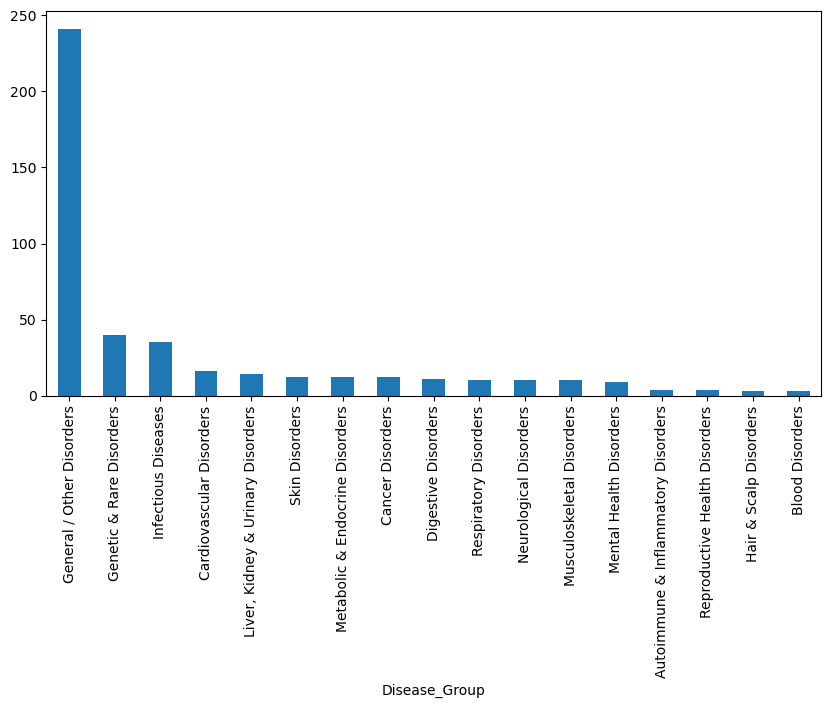

In [8]:
df['Disease_Group'].value_counts().plot(kind='bar', figsize=(10,5))


In [10]:
df.columns

Index(['Disease', 'Hindi Name', 'Marathi Name', 'Symptoms',
       'Diagnosis & Tests', 'Symptom Severity', 'Duration of Treatment',
       'Medical History', 'Current Medications', 'Risk Factors',
       'Environmental Factors', 'Sleep Patterns', 'Stress Levels',
       'Physical Activity Levels', 'Family History', 'Dietary Habits',
       'Allergies (Food/Env)', 'Seasonal Variation', 'Age Group', 'Gender',
       'Occupation and Lifestyle', 'Cultural Preferences',
       'Herbal/Alternative Remedies', 'Ayurvedic Herbs', 'Formulation',
       'Doshas', 'Constitution/Prakriti', 'Diet and Lifestyle Recommendations',
       'Yoga & Physical Therapy', 'Medical Intervention', 'Prevention',
       'Prognosis', 'Complications', 'Patient Recommendations',
       'Disease_Group'],
      dtype='object')

In [11]:
df['Age Group Clean'] = df['Age Group']


In [12]:
df_ml = df[['Symptoms', 'Age Group Clean', 'Gender', 'Disease_Group']]
df_ml = df_ml.dropna().reset_index(drop=True)


In [13]:
df_ml.head()

,Symptoms,Age Group Clean,Gender,Disease_Group
0,"Sore throat, chest congestion",All ages,All genders,Respiratory Disorders
1,"Frequent urination, fatigue",30-60 years,Both genders,Metabolic & Endocrine Disorders
2,"High blood pressure, stress",40-70 years,Both genders,Cardiovascular Disorders
3,"Severe headache, nausea",20-50 years,Mostly Female,Neurological Disorders
4,"Joint pain, swelling",40+ years,Both genders,Musculoskeletal Disorders


In [14]:
from sklearn.preprocessing import LabelEncoder

age_encoder = LabelEncoder()
gender_encoder = LabelEncoder()

df_ml['Age Group Clean'] = age_encoder.fit_transform(df_ml['Age Group Clean'])
df_ml['Gender'] = gender_encoder.fit_transform(df_ml['Gender'])


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    stop_words='english',
    max_features=5000
)

X_symptoms = tfidf.fit_transform(df_ml['Symptoms'])


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    stop_words='english',
    max_features=5000
)

X_symptoms = tfidf.fit_transform(df_ml['Symptoms'])


In [19]:
from scipy.sparse import hstack

X_other = df_ml[['Age Group Clean', 'Gender']].values
X = hstack([X_symptoms, X_other])


In [20]:
y = df_ml['Disease_Group']


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [23]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)


0.4111111111111111

In [24]:
def predict_disease_group(symptoms, age_group, gender):
    symptoms_vec = tfidf.transform([symptoms])
    age_val = age_encoder.transform([age_group])[0]
    gender_val = gender_encoder.transform([gender])[0]

    final_input = hstack([symptoms_vec, [[age_val, gender_val]]])
    return model.predict(final_input)[0]


In [25]:
predict_disease_group(
    "chest pain shortness of breath fatigue",
    "Adult",
    "Male"
)


'Cancer Disorders'

In [26]:
predict_disease_group(
    "severe headache nausea sensitivity to light",
    "Adult",
    "Female"
)


'Neurological Disorders'

In [27]:
predict_disease_group(
    "high fever body ache chills weakness",
    "Adult",
    "Female"
)


'Infectious Diseases'

In [28]:
def get_diseases_by_group(group, df):
    return df[df['Disease_Group'] == group]


In [29]:
from sklearn.metrics.pairwise import cosine_similarity

def find_best_disease(user_symptoms, df_group):
    symptom_vectors = tfidf.transform(df_group['Symptoms'])
    user_vector = tfidf.transform([user_symptoms])

    similarity = cosine_similarity(user_vector, symptom_vectors)
    best_index = similarity.argmax()

    return df_group.iloc[best_index]


In [30]:
def ayurfit_recommend(symptoms, age_group, gender, df):
    predicted_group = predict_disease_group(symptoms, age_group, gender)

    df_group = get_diseases_by_group(predicted_group, df)

    if df_group.empty:
        return "No suitable recommendation found."

    best_match = find_best_disease(symptoms, df_group)

    return {
        "Predicted Disease Group": predicted_group,
        "Likely Disease": best_match['Disease'],
        "Ayurvedic Herbs": best_match['Ayurvedic Herbs'],
        "Diet & Lifestyle": best_match['Diet and Lifestyle Recommendations'],
        "Yoga & Therapy": best_match['Yoga & Physical Therapy'],
        "Prevention": best_match['Prevention']
    }


In [31]:
ayurfit_recommend(
    "abdominal pain acidity bloating",
    "Adult",
    "Female",
    df
)


{'Predicted Disease Group': 'Cancer Disorders',
 'Likely Disease': 'Pancreatic Cancer',
 'Ayurvedic Herbs': 'None specific',
 'Diet & Lifestyle': 'Avoid processed foods; consume a fiber-rich diet and limit alcohol intake.',
 'Yoga & Therapy': 'None specific',
 'Prevention': 'Avoid Smoking, Healthy Diet'}

In [32]:
predict_disease_group(
    "acidity bloating indigestion stomach burning",
    "Adult",
    "Female"
)


'Cancer Disorders'

In [33]:
ayurfit_recommend(
    "shortness of breath chest tightness wheezing",
    "Adult",
    "Female",
    df
)

{'Predicted Disease Group': 'Cardiovascular Disorders',
 'Likely Disease': 'Cardiomyopathy',
 'Ayurvedic Herbs': 'Arjuna, Ashwagandha',
 'Diet & Lifestyle': 'Avoid heavy exertion; include antioxidant-rich foods.',
 'Yoga & Therapy': 'Pranayama, Cardio Yoga',
 'Prevention': 'Healthy Heart Habits'}

In [ ]:
s